### Reading the Data

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv('datasets/Fraud-Detection-Transactions-Dataset/synthetic_fraud_dataset.csv')

In [24]:
print(df.shape)
df.columns = df.columns.str.strip()
#drop: Transaction_ID, User_ID
df.drop(['Transaction_ID', 'User_ID'], axis=1, inplace=True)
# Convert to datetime if not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract hour
df['Hour'] = df['Timestamp'].dt.hour

# Drop original Timestamp column
df = df.drop(columns=['Timestamp'])
df.head()

(50000, 21)


,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Hour
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,19
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,4
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,15
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,0
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,23


## Factorization

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_Amount            50000 non-null  float64
 1   Transaction_Type              50000 non-null  object 
 2   Account_Balance               50000 non-null  float64
 3   Device_Type                   50000 non-null  object 
 4   Location                      50000 non-null  object 
 5   Merchant_Category             50000 non-null  object 
 6   IP_Address_Flag               50000 non-null  int64  
 7   Previous_Fraudulent_Activity  50000 non-null  int64  
 8   Daily_Transaction_Count       50000 non-null  int64  
 9   Avg_Transaction_Amount_7d     50000 non-null  float64
 10  Failed_Transaction_Count_7d   50000 non-null  int64  
 11  Card_Type                     50000 non-null  object 
 12  Card_Age                      50000 non-null  int64  
 13  T

In [26]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.factorize(df[col])[0]
        print(f"Column '{col}' has {df[col].nunique()} unique values.")

Column 'Transaction_Type' has 4 unique values.
Column 'Device_Type' has 3 unique values.
Column 'Location' has 5 unique values.
Column 'Merchant_Category' has 5 unique values.
Column 'Card_Type' has 4 unique values.
Column 'Authentication_Method' has 4 unique values.


In [27]:
df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Hour
0,39.79,0,93213.17,0,0,0,0,0,7,437.63,3,0,65,883.17,0,0.8494,0,0,19
1,1.19,1,75725.25,1,1,1,0,0,13,478.76,4,1,186,2203.36,1,0.0959,0,1,4
2,28.96,2,1588.96,2,2,2,0,0,14,50.01,4,2,226,1909.29,0,0.8400,0,1,15
3,254.32,3,76807.20,2,1,1,0,0,8,182.48,4,2,76,1311.86,2,0.7935,0,1,0
4,31.28,0,92354.66,1,2,3,0,1,14,328.69,4,1,140,966.98,1,0.3819,1,1,23


## Normalization

In [28]:
mx = MinMaxScaler()
for col in df.columns:
    df[col] = mx.fit_transform(df[[col]])

In [29]:
df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Hour
0,0.033889,0.000000,0.931806,0.0,0.00,0.00,0.0,0.0,0.461538,0.872714,0.75,0.000000,0.268908,0.176595,0.000000,0.849385,0.0,0.0,0.826087
1,0.001014,0.333333,0.756044,0.5,0.25,0.25,0.0,0.0,0.923077,0.956653,1.00,0.333333,0.777311,0.440650,0.333333,0.095810,0.0,1.0,0.173913
2,0.024665,0.666667,0.010940,1.0,0.50,0.50,0.0,0.0,1.000000,0.081653,1.00,0.666667,0.945378,0.381832,0.000000,0.839984,0.0,1.0,0.652174
3,0.216601,1.000000,0.766918,1.0,0.25,0.25,0.0,0.0,0.538462,0.352000,1.00,0.666667,0.315126,0.262339,0.666667,0.793479,0.0,1.0,0.000000
4,0.026641,0.000000,0.923178,0.5,0.50,0.75,0.0,1.0,1.000000,0.650388,1.00,0.333333,0.584034,0.193358,0.333333,0.381838,1.0,1.0,1.000000


## Data Splitting

In [30]:
X = df.drop(columns=["Fraud_Label"])
y = df["Fraud_Label"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

# Model Training

## SVM Model

In [32]:
model_svm = SVC(kernel='poly', degree=4, C=4.0)

In [33]:
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)


f1_score_svm = f1_score(y_test, y_pred)

precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)

confusion_matrix_svm = confusion_matrix(y_test, y_pred)
classification_report_svm = classification_report(y_test, y_pred)


print("Accuracy: %.4f%%" % (accuracy * 100.0))
print("F1 Score: %.4f" % f1_score_svm)
print("Precision: %.4f" % precision_svm)
print("Recall: %.4f" % recall_svm)
print("Confusion Matrix:\n", confusion_matrix_svm)
print("Classification Report:\n", classification_report_svm)


Accuracy: 98.5400%
F1 Score: 0.9772
Precision: 0.9794
Recall: 0.9751
Confusion Matrix:
 [[6721   66]
 [  80 3133]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6787
         1.0       0.98      0.98      0.98      3213

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



## Logistic Regression Model

In [35]:
model_logistic = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2', C=1.0)

In [36]:
model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
f1_score_lr = f1_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)

confusion_matrix_lr = confusion_matrix(y_test, y_pred)
classification_report_lr = classification_report(y_test, y_pred)
print("Logistic Regression Results:")

print("Accuracy: %.4f%%" % (accuracy * 100.0))
print("F1 Score: %.4f" % f1_score_lr)
print("Precision: %.4f" % precision_lr)
print("Recall: %.4f" % recall_lr)
print("Confusion Matrix:\n", confusion_matrix_lr)
print("Classification Report:\n", classification_report_lr)


Logistic Regression Results:
Accuracy: 79.9400%
F1 Score: 0.6732
Precision: 0.7063
Recall: 0.6430
Confusion Matrix:
 [[5928  859]
 [1147 2066]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      6787
         1.0       0.71      0.64      0.67      3213

    accuracy                           0.80     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.80      0.80      0.80     10000



## Decision Tree Model

In [ ]:
model_decision_tree = DecisionTreeClassifier(max_depth=20, random_state=42, criterion='entropy', splitter='best')

In [ ]:
model_decision_tree.fit(X_train, y_train)
y_pred = model_decision_tree.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 100.0000%


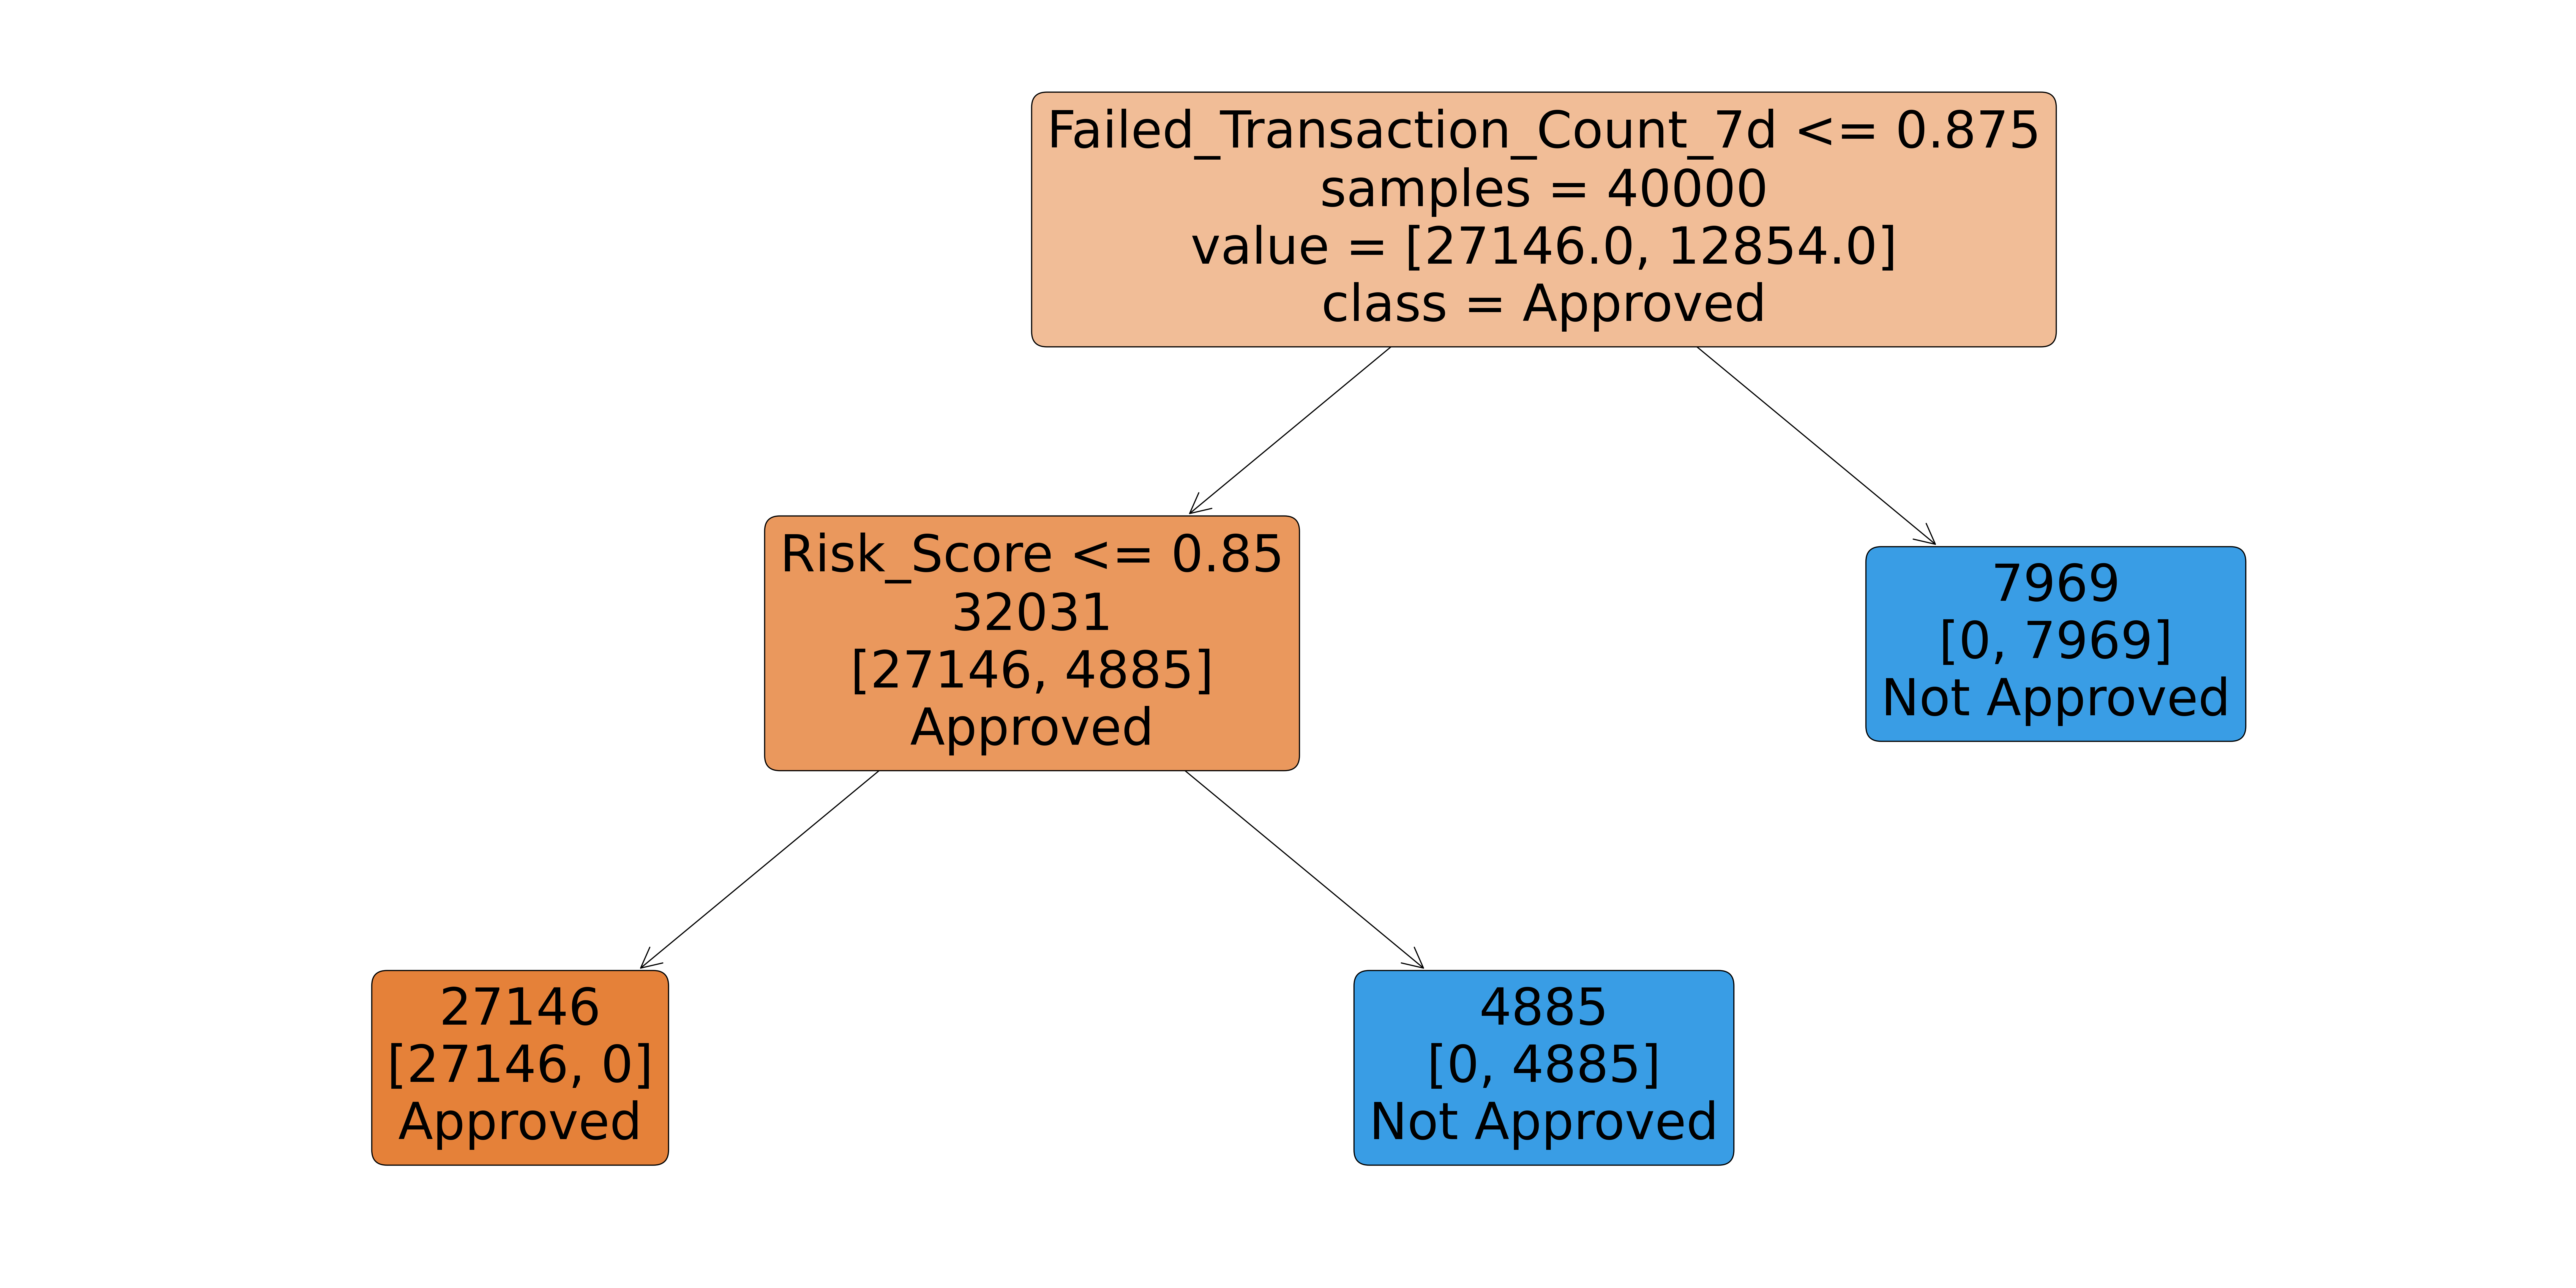

In [ ]:
plt.figure(figsize=(40, 20), dpi=300)
plot_tree(
    model_decision_tree,
    feature_names=X.columns,
    class_names=["Approved", "Not Approved"],
    filled=True,
    rounded=True,
    impurity=False,
    label="root"
)
plt.savefig("Trees/decision_tree_ml_fraud.png", bbox_inches="tight")
# plt.close()
